In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler #helps us to normalize features that have different scales by removing the mean and scaling to unit variance.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score #To perform the performance metrics calc on models.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from skopt import BayesSearchCV

import matplotlib.pyplot as plt


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
import seaborn as sns

In [19]:
data = pd.read_csv("C:/Users/kavir/OneDrive/Documents/GitHub/Data-Mining-CSCI-5502-872-Course-Project/datasets/training_df_raw.csv")
data.fillna(0, inplace=True)
data.drop(['date', 'time'], axis=1, inplace=True)

In [20]:
X = data.drop('fire', axis=1)
y = data['fire']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_train_pred = knn_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

Training Accuracy: 0.8424


In [26]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0, 1, 0, ..., 1, 1, 0])

Confusion Matrix for KNN:


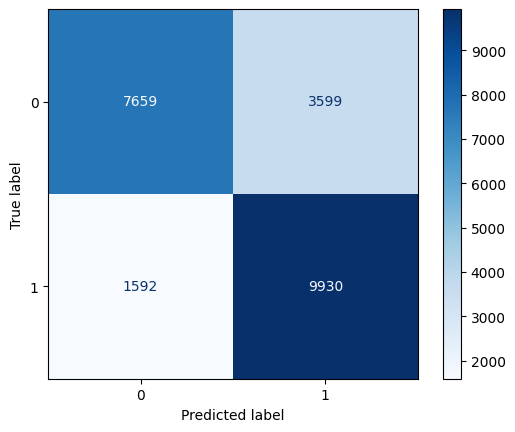

In [27]:
print("Confusion Matrix for KNN:")
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn).plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
print("Classification Metrics for KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

Classification Metrics for KNN:
Accuracy: 0.7721
Precision: 0.7340
Recall: 0.8618
F1 Score: 0.7928


In [29]:
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75     11258
           1       0.73      0.86      0.79     11522

    accuracy                           0.77     22780
   macro avg       0.78      0.77      0.77     22780
weighted avg       0.78      0.77      0.77     22780



In [30]:
#Hyperparameter Tuning for KNN using Bayesian Optimization

param_space_knn = {
    'n_neighbors': (1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

bayes_search_knn = BayesSearchCV(
    estimator=KNeighborsClassifier(),
    search_spaces=param_space_knn,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
bayes_search_knn.fit(X_train, y_train)

c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(5), np.str_('distance')] before, using random point ['euclidean', np.int64(3), 'distance']
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(1), np.str_('uniform')] before, using random point ['euclidean', np.int64(7), 'distance']
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(4), np.str_('distance')] before, using random point ['euclidean', np.int64(9), 'uniform']
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated

BayesSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
              random_state=42, scoring='accuracy',
              search_spaces={'metric': ['euclidean', 'manhattan', 'minkowski'],
                             'n_neighbors': (1, 20),
                             'weights': ['uniform', 'distance']})

In [31]:
# Best model after tuning
best_knn = bayes_search_knn.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test)

In [32]:
# Display metrics after tuning
print("Metrics after Bayesian Optimization for KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn_tuned):.4f}")

Metrics after Bayesian Optimization for KNN:
Accuracy: 0.7940
Precision: 0.7591
Recall: 0.8682
F1 Score: 0.8100


Confusion Matrix for KNN after tuning:


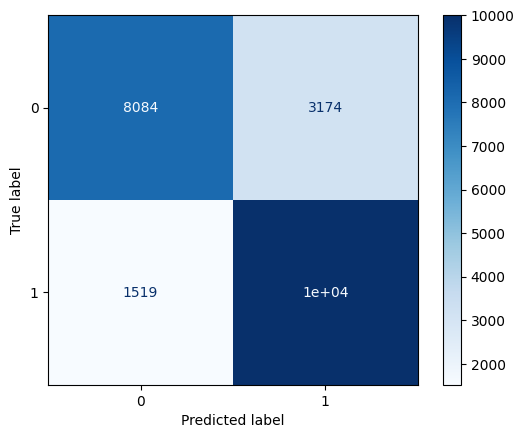

In [33]:
# 8) Confusion Matrix and Classification Report after tuning for KNN
print("Confusion Matrix for KNN after tuning:")
conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn_tuned).plot(cmap=plt.cm.Blues)
plt.show()

In [34]:

print("Classification Report for KNN after tuning:")
print(classification_report(y_test, y_pred_knn_tuned))

Classification Report for KNN after tuning:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78     11258
           1       0.76      0.87      0.81     11522

    accuracy                           0.79     22780
   macro avg       0.80      0.79      0.79     22780
weighted avg       0.80      0.79      0.79     22780



In [35]:
# Cross-Validation Scores for KNN
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for KNN: {cv_scores_knn}")

Cross-Validation Scores for KNN: [0.78264925 0.77665587 0.78077155 0.78346046 0.7826922 ]


In [36]:
# Best Cross-Validation Score for KNN
print(f"Best Cross-Validation Score for KNN: {cv_scores_knn.max():.4f}")

Best Cross-Validation Score for KNN: 0.7835


Now we're done with KNN, Proceeding for Naive bayes

In [37]:
# Training and Evaluation for Naive Bayes Model
print("Naive Bayes Model")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

Naive Bayes Model


GaussianNB()

In [38]:
# Display Training Accuracy
y_train_pred_nb = nb_model.predict(X_train)
train_acc_nb = accuracy_score(y_train, y_train_pred_nb)
print(f"Training Accuracy: {train_acc_nb:.4f}")

Training Accuracy: 0.5292


In [39]:
# Predictions on test data
y_pred_nb = nb_model.predict(X_test)

Confusion Matrix for Naive Bayes:


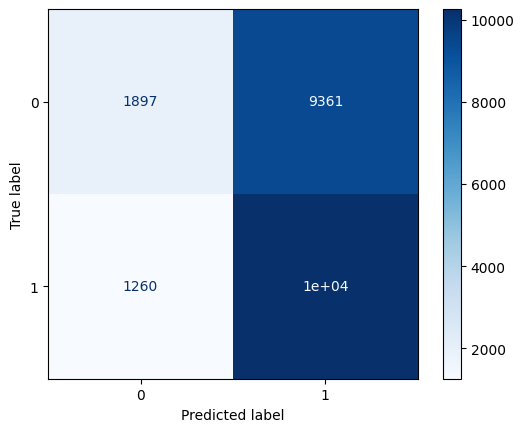

In [40]:
# Confusion Matrix and Metrics for Naive Bayes
print("Confusion Matrix for Naive Bayes:")
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=conf_mat_nb).plot(cmap=plt.cm.Blues)
plt.show()

In [41]:
print("Classification Metrics for Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.4f}")

Classification Metrics for Naive Bayes:
Accuracy: 0.5338
Precision: 0.5230
Recall: 0.8906
F1 Score: 0.6590


In [42]:
# 6) Classification Report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      0.17      0.26     11258
           1       0.52      0.89      0.66     11522

    accuracy                           0.53     22780
   macro avg       0.56      0.53      0.46     22780
weighted avg       0.56      0.53      0.46     22780



In [43]:
# 7) Hyperparameter Tuning for Naive Bayes using Bayesian Optimization
param_space_nb = {
    'var_smoothing': (1e-10, 1e-2, 'log-uniform')
}

bayes_search_nb = BayesSearchCV(
    estimator=GaussianNB(),
    search_spaces=param_space_nb,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
bayes_search_nb.fit(X_train, y_train)

c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2.1647689075627765e-10] before, using random point [3.2256492639829156e-05]
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7.782695997538567e-10] before, using random point [4.935310868008654e-10]
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.1348999073733537e-08] before, using random point [2.1500425488187653e-07]
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5.210731434209367e-09] before, using random point [3.523628399139671e-06]
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_

BayesSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1, random_state=42,
              scoring='accuracy',
              search_spaces={'var_smoothing': (1e-10, 0.01, 'log-uniform')})

In [44]:
# Best model after tuning
best_nb = bayes_search_nb.best_estimator_
y_pred_nb_tuned = best_nb.predict(X_test)

In [45]:
# Display metrics after tuning
print("Metrics after Bayesian Optimization for Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb_tuned):.4f}")

Metrics after Bayesian Optimization for Naive Bayes:
Accuracy: 0.5338
Precision: 0.5230
Recall: 0.8906
F1 Score: 0.6590


Confusion Matrix for Naive Bayes after tuning:


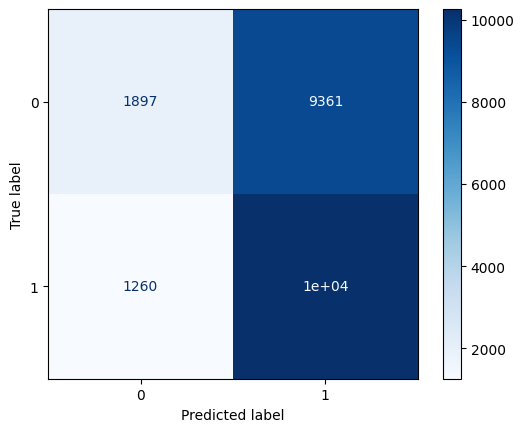

In [46]:
# Confusion Matrix and Classification Report after tuning for Naive Bayes
print("Confusion Matrix for Naive Bayes after tuning:")
conf_mat_nb_tuned = confusion_matrix(y_test, y_pred_nb_tuned)
ConfusionMatrixDisplay(confusion_matrix=conf_mat_nb_tuned).plot(cmap=plt.cm.Blues)
plt.show()

In [47]:
print("Classification Report for Naive Bayes after tuning:")
print(classification_report(y_test, y_pred_nb_tuned))

Classification Report for Naive Bayes after tuning:
              precision    recall  f1-score   support

           0       0.60      0.17      0.26     11258
           1       0.52      0.89      0.66     11522

    accuracy                           0.53     22780
   macro avg       0.56      0.53      0.46     22780
weighted avg       0.56      0.53      0.46     22780



In [48]:
#  Cross-Validation Scores for Naive Bayes
cv_scores_nb = cross_val_score(best_nb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Naive Bayes: {cv_scores_nb}")

Cross-Validation Scores for Naive Bayes: [0.51838235 0.51753279 0.57712781 0.5398672  0.52861768]


In [49]:
# Best Cross-Validation Score for Naive Bayes
print(f"Best Cross-Validation Score for Naive Bayes: {cv_scores_nb.max():.4f}")

Best Cross-Validation Score for Naive Bayes: 0.5771


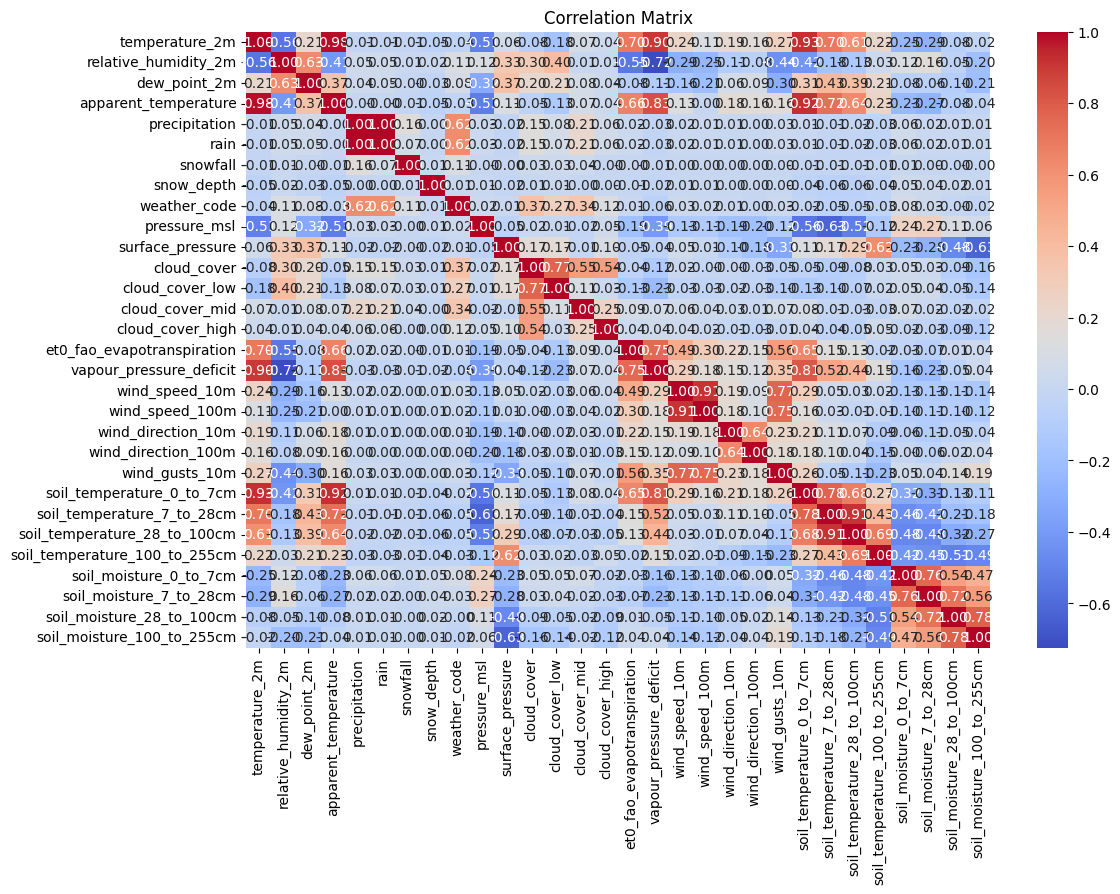

In [50]:
#  Plotting Correlation Matrix using Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()